# **K-Nearest Neighbor (KNN)**

## **Deteksi Outlier Menggunakann K-Nearest Neighbor(KNN)**
Nearest Neighbor atau *K-Nearest Neighbor (KNN)* merupakan salah satu algoritme klasifikasi dalam data mining yang memanfaatkan data terdekat untuk melakukan prediksi pada data baru yang belum dikenal (data uji).

Algoritme ini bekerja dengan cara mencari sejumlah tetangga terdekat dari data uji dan menentukan kelas data uji tersebut berdasarkan mayoritas kelas dari tetangga terdekat (data latih) yang ditemukan. Nearest Neighbor dapat digunakan untuk menangani berbagai jenis data, baik data numerik maupun kategorikal. Pada data kategorikal, perhitungan jarak perbedaan atau kesamaan tidak dapat dihitung menggunakan operasi matematik seperti yang dapat dilakukan pada data numerik.

### **Alur Kerja Nearst Neighbor**

#### **1. Menentukan jumlah tetangga terdekat(k) yang akan dipilih**
Penentuan nilai K tidak memiliki rumus pasti, tetapi ada beberapa tips yang dapat dipertimbangkan. Misalnya, jika jumlah kelas adalah genap, disarankan untuk memilih nilai K ganjil, sedangkan jika jumlah kelas adalah ganjil, disarankan memilih nilai K genap.

#### **2. Hitung jarak antara data uji dengan semua data latih**
Setelah menentukan nilai K, langkah selanjutnya dalam algoritme Nearest Neighbor adalah menghitung jarak antara data uji dengan semua data latih. Jarak ini dapat dihitung menggunakan berbagai metode, seperti:
- Euclidean distance

    Euclidean didefinisikan sebagai jarak lurus antara dua titik pada bidang atau ruang, jadi Euclidean hanya digunakan untuk menghitung jarak pada dua fitur atau titik saja. Untuk rumus dari euclidean:
    
    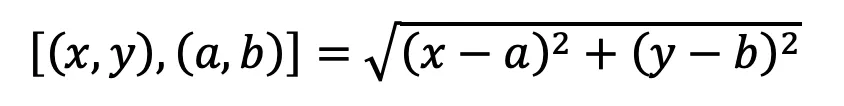
- Minkowski distance

    Minkowski merupakan metrik yang digunakan untuk menghitung ruang vektor bernilai rill, yang berarti dalam ruang dimana jarak dapat direpresentasikan sebagai vektor yang memiliki panjang dan panjangnya tidak boleh negatif. Untuk rumus dari Minkowski:

    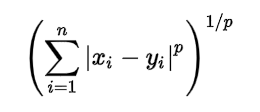
- Manhattan distance

    Jarak ini juga dikenal sebagai jarak taksi atau jarak blok kota, karena cara penghitungan jarak ini. Rumus jarak Manhattan didapatkan dari mensubstitusi p=1 dalam rumu jarak Minkowski.

    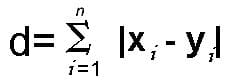

#### **3. Mengurutkan data latih berdasarkan jarak dari yang terdekat ke yang terjauh dengan data uji**
Setelah kita menghitung jarak antara data latih dengan data uji menggunakan suatu metrik, langkah selanjutnya adalah mengurutkan data latih berdasarkan jarak dari yang terdekat ke yang terjauh dengan data uji. Dalam hal ini, data latih yang paling dekat dengan data uji akan ditempatkan di bagian atas daftar, sedangkan data latih yang paling jauh akan ditempatkan di bagian bawah daftar. Hal ini dilakukan untuk memudahkan dalam mencari tetangga terdekat dari data uji pada langkah selanjutnya.

#### **4. Pilih (k) data dengan jarak terdekat dari data uji**
Setelah data latih diurutkan berdasarkan jarak terdekat dengan data uji, selanjutnya pilih K data dengan jarak terkecil. Banyaknya K di sini berdasarkan jumlah K yang telah ditentukan di awal.

#### **5. Hitung frekuensi masing-masing kategori pada (k) data yang telah dipilih**
Dalam penghitungan frekuensi ini, setiap kategori akan dihitung berapa kali muncul pada K data tersebut dan kemudian dicatat jumlahnya. Dengan mengetahui frekuensi masing-masing kategori, kita dapat menentukan kategori mana yang paling banyak muncul dan kemudian menjadikannya sebagai hasil prediksi untuk data yang sedang dicari kategori-nya.

### **Contoh Kasus**

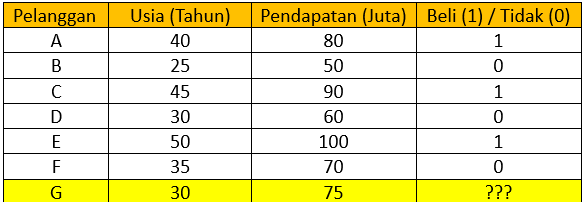

#### **Langkah-langkah Penyelesaian untuk G (30,75)**

1. Menentukan tetangga terdekat

    Disini saya menggunakan k = 3 dan menghitungnya untuk mengetahui tetangga terdekat.

2. Hitung Jarak
    Menghitung jarak menggunakan Euclidean Distance

    Hitung jarak antara pelanggan **G (30, 75)** dengan setiap pelanggan lain:
    - **Jarak ke A (40,80):**
    
    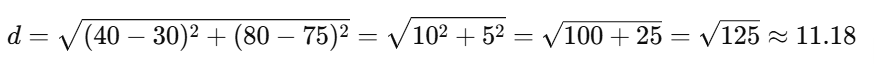
    - **Jarak ke B (25, 50):**

    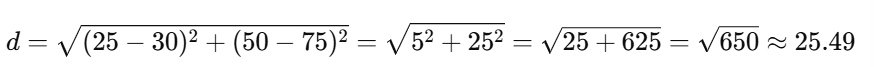
    - **Jarak ke C (45,90):**

    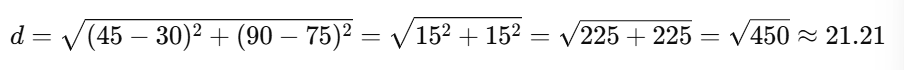
    - **Jarak ke D (30,60):**

    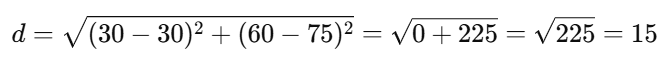
    - **Jarak ke E (50,100):**

    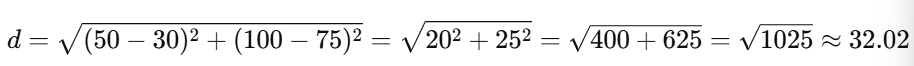
    - **Jarak ke F (35, 70):**

    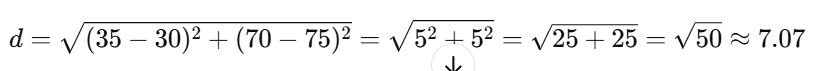

3. Mengurutkan Data
  
    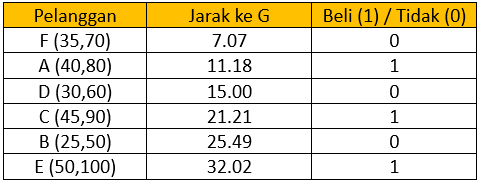
    
    Tiga tetangga terdekat adalah F (0), A (1), dan D (0).


4. Menghitung frekuensi
    Dari 3 tetangga terdekat:
    - 2 pelanggan tidak membeli (0)
    - 1 pelanggan membeli (1)
  
  Mayoritasnya adalah 0, maka pelanggan **G** diprediksi tidak membeli produk (0).

### **Mencari Data Outlier dalam Data Iris**

#### **Mengambil Data dari Database**

##### **Lokasi**
Teruntuk lokasi dari data **IRIS** berada dalam **aiven.io** (platform cloud dan AI berbasis open source):


*   Data IRIS *petal* berada di database **MySQL**
*   Data IRIS *sepal* berada di database **PostgreSQL**

##### **Metode Pengumpulan**
Langkah untuk mengumpulkan data dilakukan menggunakan **Python** sebagai berikut:
*   **`pymysql`** : Digunakan untuk menghubungkan dan mengambil data dari MySQL.
*   **`psycopg2`** : Digunakan untuk menghubungkan dan mengambil data dari PostgreSQL.
*   **`pandas`** : Digunakan untuk membaca dan mengolah data setelah diambil dari database.

#### **Proses Mendeteksi Outlier**

##### **1. Menghubungkan Data dari MySQL dan PostgreSQL**
a. Install library yang diperlukan
- **`sqlalchemy`** : Library yang digunakan untuk ORM (Object Relation Mapping) dan memudahkan untuk interaksi dengan database menggunakan objek Python tanpa perlu menulis SQL secara langsung.
- **`python-dotenv`** : Digunakan untuk mengelola variabel lingkungan (.env file) dalam Python.

In [ ]:
!pip install pymysql
!pip install pandas
!pip install psycopg2-binary
!pip install sqlalchemy
!pip install python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.6 MB/s eta 0:00:00



b.   Buat file dengan format (.env) untuk koneksi database dari **aiven**. Untuk isi dari file tersebut sebagai berikut:

```python
# Database MySQL
MYSQL_HOST=<HOSTNAME>
MYSQL_USER=<USERNAME>
MYSQL_PASSWORD=<PASSWORD>
MYSQL_PORT=<PORT>
MYSQL_DATABASE=<DATABASE_NAME>

# Database PostgreSQL
PG_HOST=<HOSTNAME>
PG_USER=<USERNAME>
PG_PASSWORD=<PASSWORD>
PG_PORT=<PORT>
PG_DATABASE=<DATABASE_NAME>
```
c. Lalu upload filenya ke colab.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving .env to .env


In [ ]:
if os.path.exists(".env"):
    os.remove(".env")

d. Koneksikan database dari aiven

- **`pandas`** : Digunakan untuk memproses dan membaca data dari berbagai sumber (CSV, Excel, Database, dll).
- **`os`** : Digunakan untuk berinteraksi dengan sistem operasi.
- **`dotenv`** : Digunakan untuk memuat variabel lingkungan dari file **`.env`**


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

load_dotenv()

# Ambil variabel koneksi dari lingkungan
MYSQL_HOST = os.getenv("MYSQL_HOST")
MYSQL_PORT = os.getenv("MYSQL_PORT")
MYSQL_USER = os.getenv("MYSQL_USER")
MYSQL_PASSWORD = os.getenv("MYSQL_PASSWORD")
MYSQL_DATABASE = os.getenv("MYSQL_DATABASE")

PG_HOST = os.getenv("PG_HOST")
PG_PORT = os.getenv("PG_PORT")
PG_USER = os.getenv("PG_USER")
PG_PASSWORD = os.getenv("PG_PASSWORD")
PG_DATABASE = os.getenv("PG_DATABASE")

# Gunakan SQLAlchemy untuk koneksi ke MySQL
mysql_engine = create_engine(f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DATABASE}")

# Gunakan SQLAlchemy untuk koneksi ke PostgreSQL
pg_engine = create_engine(f"postgresql+psycopg2://{PG_USER}:{PG_PASSWORD}@{PG_HOST}:{PG_PORT}/{PG_DATABASE}")

# Jalankan query
mysql_query = "SELECT * FROM iris_data;"
df_mysql = pd.read_sql(mysql_query, mysql_engine)

pg_query = "SELECT * FROM iris_data;"
df_postgres = pd.read_sql(pg_query, pg_engine)

# Print hasil
print("Data dari MySQL:")
print(df_mysql.head())

print("\nData dari PostgreSQL:")
print(df_postgres.head())

Data dari MySQL:
   id        class  petal_length  petal_width
0   1  Iris-setosa           1.4          0.2
1   2  Iris-setosa          14.0          2.0
2   3  Iris-setosa           1.3          0.2
3   4  Iris-setosa           1.5          0.2
4   5  Iris-setosa           1.4          0.2

Data dari PostgreSQL:
   id        class  sepal_length  sepal_width
0   1  Iris-setosa           5.1          3.5
1   3  Iris-setosa           4.7          3.2
2   4  Iris-setosa           4.6          3.1
3   5  Iris-setosa           5.0          3.6
4   6  Iris-setosa           5.4          3.9


##### **2. Menggabungkan data**

In [ ]:
# Menggabungkan data
df_combined = pd.merge(df_postgres, df_mysql.drop(columns=['class']), on="id", how="inner")

print("\nData gabungan:")
print(df_combined)


Data gabungan:
      id           class  sepal_length  sepal_width  petal_length  petal_width
0      1     Iris-setosa           5.1          3.5           1.4          0.2
1      3     Iris-setosa           4.7          3.2           1.3          0.2
2      4     Iris-setosa           4.6          3.1           1.5          0.2
3      5     Iris-setosa           5.0          3.6           1.4          0.2
4      6     Iris-setosa           5.4          3.9           1.7          0.4
..   ...             ...           ...          ...           ...          ...
146  148  Iris-virginica           6.5          3.0           5.2          2.0
147  149  Iris-virginica           6.2          3.4           5.4          2.3
148  150  Iris-virginica           5.9          3.0           5.1          1.8
149    2     Iris-setosa          40.9         30.0          14.0          2.0
150  151               ?           5.8          1.0           5.1          3.2

[151 rows x 6 columns]


##### **3. Menghitung jarak menggunakan Euclidean Distance**
a. **`euclidean`** : Digunakan untuk menghitung jarak euclidean antara dua titik dalam ruang berdimensi apapun.

b. **`IPython.display`** : Digunakan untuk menampilkan output dalam format html di Jupyter Notebook.

c. **`numpy`** : Digunakan untuk mengelola data dalam bentuk array dan melakukan komputasi numerik dengan cepat.

In [ ]:
from scipy.spatial.distance import euclidean
from IPython.display import display, HTML
import numpy as np

# Ambil fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_combined[feature_columns].values

# Ambil referensi dari baris terakhir
reference_point = data_values[-1]

# Fungsi untuk menghitung jarak Euclidean
def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dan tambahkan ke DataFrame
df_combined["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier (persentil ke-93.5)
threshold = np.percentile(df_combined["distance"], 93.5)
df_combined["outlier"] = df_combined["distance"] > threshold

#Menampilkan hasil
display(HTML(df_combined.to_html()))

,id,class,sepal_length,sepal_width,petal_length,petal_width,distance,outlier
0,1,Iris-setosa,5.1,3.5,1.4,0.2,5.424942,False
1,3,Iris-setosa,4.7,3.2,1.3,0.2,5.430470,False
2,4,Iris-setosa,4.6,3.1,1.5,0.2,5.273519,False
3,5,Iris-setosa,5.0,3.6,1.4,0.2,5.485435,True
4,6,Iris-setosa,5.4,3.9,1.7,0.4,5.288667,False
5,7,Iris-setosa,4.6,3.4,1.4,0.3,5.412947,False
6,8,Iris-setosa,5.0,3.4,1.5,0.2,5.325411,False
7,9,Iris-setosa,4.4,2.9,1.4,0.2,5.316014,False
8,10,Iris-setosa,4.9,3.1,1.5,0.1,5.271622,False
9,11,Iris-setosa,5.4,3.7,1.5,0.2,5.423099,False


##### **4. Menghitung frekuensi oulier**

Dari perhitungan tersebut, terdapat 10 outlier dengan menggunakan fungsi sum.

In [ ]:
# Menghitung total outlier
total_outliers = df_combined["outlier"].sum()
print(f"Total Outlier: {total_outliers}")

Total Outlier: 10


##### **5. Mengurutkan jarak dari terkecil ke terbesar**

Menampilkan hasil jarak dari terkecil ke terbesar

In [ ]:
# Urutkan data berdasarkan jarak dari terkecil ke terbesar
df_sorted = df_combined.sort_values(by="distance", ascending=True)

# Tampilkan hasilnya
print(df_sorted.to_string(index=False))

 id           class  sepal_length  sepal_width  petal_length  petal_width  distance  outlier
151               ?           5.8          1.0           5.1          3.2  0.000000    False
114  Iris-virginica           5.7          2.5           5.0          2.0  1.926136    False
115  Iris-virginica           5.8          2.8           5.1          2.4  1.969772    False
147  Iris-virginica           6.3          2.5           5.0          1.9  2.049390    False
120  Iris-virginica           6.0          2.2           5.0          1.5  2.092845    False
102  Iris-virginica           5.8          2.7           5.1          1.9  2.140093    False
143  Iris-virginica           5.8          2.7           5.1          1.9  2.140093    False
122  Iris-virginica           5.6          2.8           4.9          2.0  2.181742    False
133  Iris-virginica           6.4          2.8           5.6          2.2  2.202272    False
 69 Iris-versicolor           6.2          2.2           4.5          

##### **6. Tabel outlier**

Tampilan untuk tabel outlier.

In [ ]:
df_outliers = df_combined[df_combined["outlier"]]

display(HTML(df_outliers.to_html()))

,id,class,sepal_length,sepal_width,petal_length,petal_width,distance,outlier
3,5,Iris-setosa,5.0,3.6,1.4,0.2,5.485435,True
12,14,Iris-setosa,4.3,3.0,1.1,0.1,5.644466,True
13,15,Iris-setosa,5.8,4.0,1.2,0.2,5.762812,True
14,16,Iris-setosa,5.7,4.4,1.5,0.4,5.689464,True
15,17,Iris-setosa,5.4,3.9,1.3,0.4,5.554278,True
21,23,Iris-setosa,4.6,3.6,1.0,0.2,5.831809,True
31,33,Iris-setosa,5.2,4.1,1.5,0.1,5.704384,True
32,34,Iris-setosa,5.5,4.2,1.4,0.2,5.746303,True
41,43,Iris-setosa,4.4,3.2,1.3,0.2,5.499091,True
149,2,Iris-setosa,40.9,30.0,14.0,2.0,46.407542,True


##### **7. Visualisasi outlier**

- **`matplotlib`** : Digunakan untuk membuat berbagai jenis grafik dalam Python.
- **`seaborn`** : Digunakan untuk analisis data statistik karena memiliki fungi membuat grafik mirip seperti **`matplotlib`**.

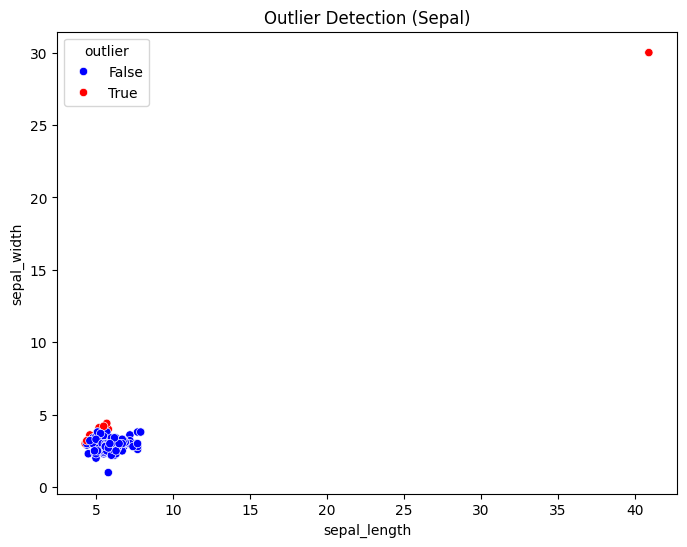

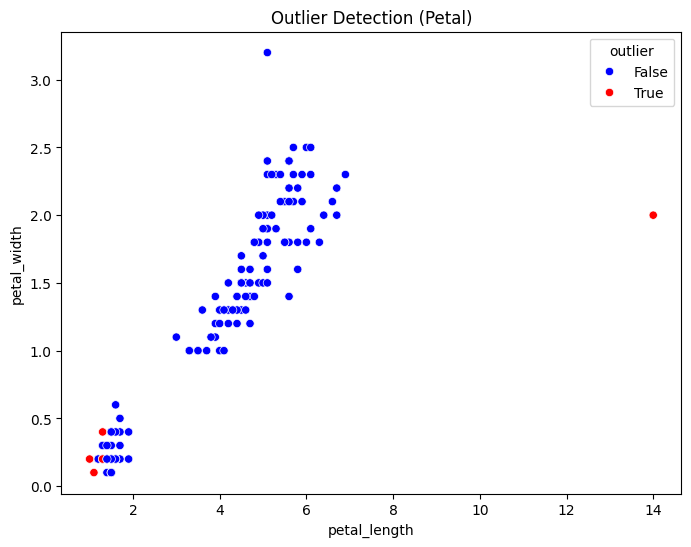

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_combined["sepal_length"], y=df_combined["sepal_width"],
    hue=df_combined["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_combined["petal_length"], y=df_combined["petal_width"],
    hue=df_combined["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

X = df_combined[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
y_pred = clf.fit_predict(X)  # This gives you the outlier predictions (-1 or 1)
# Print predictions
print("Outlier predictions (y_pred):")
print(y_pred)


Outlier predictions (y_pred):
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1
  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1]


In [ ]:
# Dapatkan indeks outlier
outlier_index = X[y_pred == -1].index

# Tampilkan indeks outlier
print("Indeks outlier:")
print(outlier_index)

Indeks outlier:
Index([19, 21, 30, 35, 40, 58, 61, 63, 105, 107, 108, 113, 133, 149, 150], dtype='int64')
